### Part 1- Data Preprocessing

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [4]:
# Importing the training set
dataset_train = pd.read_csv('Microsoft_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [5]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1259):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

Giving 3 dimensions using keras

1st Dimension- no. of stock prices

2nd Dimension- no. of timestamps

3rd Dimension- no. of indicators (i.e. only one= msft stock price)



In [7]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Part 2- Building the RNN

In [8]:
# Importing the Keras libraries and packages
from keras.models import Sequential   #To create a neural network object representing sequence of layers
from keras.layers import Dense        #To add the output layer
from keras.layers import LSTM  #To add LSTM layers
from keras.layers import Dropout #To add dropout regularization

In [9]:
# Initialising the RNN
regressor = Sequential() #We are predicting continuous value

In [10]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [11]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [12]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [13]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [14]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [15]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

Epoch 1/100
38/38 [==============================] - 20s 165ms/step - loss: 0.0329
Epoch 2/100
38/38 [==============================] - 6s 164ms/step - loss: 0.0064
Epoch 3/100
38/38 [==============================] - 6s 165ms/step - loss: 0.0064
Epoch 4/100
38/38 [==============================] - 6s 169ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 6s 164ms/step - loss: 0.0044
Epoch 6/100
38/38 [==============================] - 6s 162ms/step - loss: 0.0039
Epoch 7/100
38/38 [==============================] - 6s 162ms/step - loss: 0.0043
Epoch 8/100
38/38 [==============================] - 7s 178ms/step - loss: 0.0039
Epoch 9/100
38/38 [==============================] - 6s 170ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 7s 175ms/step - loss: 0.0047
Epoch 11/100
38/38 [==============================] - 6s 156ms/step - loss: 0.0036
Epoch 12/100
38/38 [==============================] - 6s 171ms/step - loss: 0.0037
Epoch 13/100

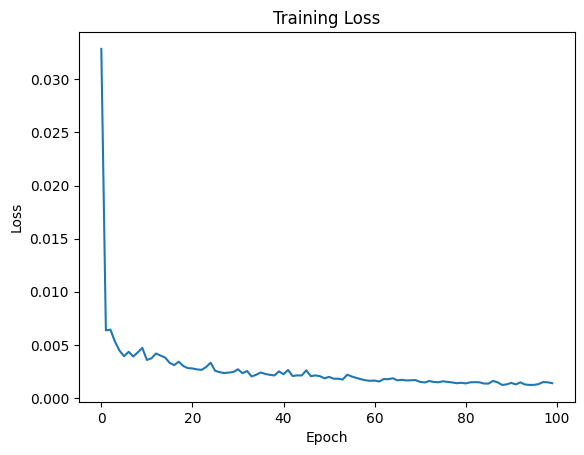

In [16]:
# Fitting the RNN to the Training set
history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

# Plotting the loss function values against the epochs
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### Part 3 - Making the predictions and visualising the results

In [17]:
 
 # Getting the real stock price of 2023
dataset_test = pd.read_csv('Microsoft_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [18]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 79):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


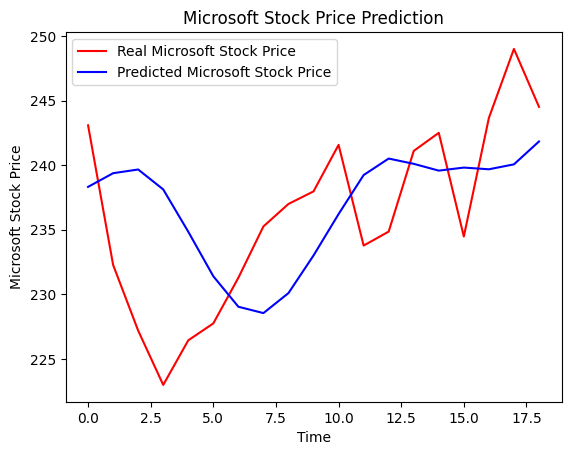

In [19]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Microsoft Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Microsoft Stock Price')
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Microsoft Stock Price')
plt.legend()
plt.savefig('figure.png', dpi=300)
plt.show()

## Evaluating the model
### Showing the closeness of predicted value and actual value

In [20]:
# RMSE
rmse = np.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('Root Mean Squared Error:', rmse)
# Calculate MAE
mae = mean_absolute_error(real_stock_price, predicted_stock_price)
print('Mean Absoulte Error:', mae)

Root Mean Squared Error: 6.859353371303375
Mean Absoulte Error: 5.977834502775494


### Showing the variance in the Target variable

In [25]:
# R-squared to show how well the model fits the data
r2 = r2_score(real_stock_price, predicted_stock_price)
print('R-square:', r2)

R-square: 0.0113552920167862


In [22]:
# Calculate MSE
mse = mean_squared_error(real_stock_price, predicted_stock_price)
print('Mean Squared Error:', mse)

Mean Squared Error: 47.050728672410976


In [23]:
# Calculate RMSE
rmse = np.sqrt(mse)
print('RMSE:', rmse)

RMSE: 6.859353371303375
